In [9]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, LSTM, Bidirectional, Dense

In [10]:
max_features = 10000  # обмеження на кількість слів
maxlen = 500  # обмеження на кількість слів у відгуку

In [11]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [12]:
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

Проста RNN мережа

In [13]:
model_rnn = Sequential()
model_rnn.add(Embedding(max_features, 32))
model_rnn.add(SimpleRNN(32))
model_rnn.add(Dense(1, activation='sigmoid'))

model_rnn.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model_rnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 322113 (1.23 MB)
Trainable params: 322113 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
history_rnn = model_rnn.fit(x_train, y_train, epochs=50, batch_size=512, validation_split=0.4)

Epoch 1/50
30/30 [==============================] - 10s 290ms/step - loss: 0.6912 - acc: 0.5235 - val_loss: 0.6845 - val_acc: 0.5636
Epoch 2/50
30/30 [==============================] - 7s 248ms/step - loss: 0.6659 - acc: 0.6223 - val_loss: 0.6742 - val_acc: 0.5753
Epoch 3/50
30/30 [==============================] - 7s 244ms/step - loss: 0.6269 - acc: 0.6911 - val_loss: 0.6376 - val_acc: 0.6329
Epoch 4/50
30/30 [==============================] - 7s 228ms/step - loss: 0.5240 - acc: 0.7690 - val_loss: 0.4972 - val_acc: 0.7703
Epoch 5/50
30/30 [==============================] - 7s 243ms/step - loss: 0.4283 - acc: 0.8267 - val_loss: 0.5500 - val_acc: 0.7216
Epoch 6/50
30/30 [==============================] - 7s 231ms/step - loss: 0.3588 - acc: 0.8579 - val_loss: 0.5793 - val_acc: 0.6857
Epoch 7/50
30/30 [==============================] - 7s 239ms/step - loss: 0.3308 - acc: 0.8587 - val_loss: 0.3851 - val_acc: 0.8372
Epoch 8/50
30/30 [==============================] - 7s 243ms/step - loss: 0

In [16]:
val_acc_rnn = history_rnn.history['val_acc'][-1]
print("Final Validation Accuracy (Simple RNN):", val_acc_rnn)

Final Validation Accuracy (Simple RNN): 0.7785000205039978


LSTM мережа


In [17]:
model_lstm = Sequential()
model_lstm.add(Embedding(max_features, 32))
model_lstm.add(LSTM(32))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model_lstm.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328353 (1.25 MB)
Trainable params: 328353 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
history_lstm = model_lstm.fit(x_train, y_train, epochs=50, batch_size=512, validation_split=0.4)

Epoch 1/50
30/30 [==============================] - 25s 788ms/step - loss: 0.6927 - acc: 0.5179 - val_loss: 0.6920 - val_acc: 0.5530
Epoch 2/50
30/30 [==============================] - 23s 765ms/step - loss: 0.6904 - acc: 0.5748 - val_loss: 0.6883 - val_acc: 0.5249
Epoch 3/50
30/30 [==============================] - 23s 757ms/step - loss: 0.6634 - acc: 0.6235 - val_loss: 0.6124 - val_acc: 0.6964
Epoch 4/50
30/30 [==============================] - 23s 773ms/step - loss: 0.5568 - acc: 0.7361 - val_loss: 0.5029 - val_acc: 0.7788
Epoch 5/50
30/30 [==============================] - 23s 761ms/step - loss: 0.4668 - acc: 0.8016 - val_loss: 0.4447 - val_acc: 0.8234
Epoch 6/50
30/30 [==============================] - 23s 761ms/step - loss: 0.4233 - acc: 0.8245 - val_loss: 0.3943 - val_acc: 0.8300
Epoch 7/50
30/30 [==============================] - 23s 777ms/step - loss: 0.3524 - acc: 0.8618 - val_loss: 0.3631 - val_acc: 0.8489
Epoch 8/50
30/30 [==============================] - 23s 778ms/step - 

In [19]:
val_acc_lstm = history_lstm.history['val_acc'][-1]
print("Final Validation Accuracy (LSTM):", val_acc_lstm)

Final Validation Accuracy (LSTM): 0.8640000224113464


Двостороння LSTM мережа

In [20]:
model_bidirectional = Sequential()
model_bidirectional.add(Embedding(max_features, 32))
model_bidirectional.add(Bidirectional(LSTM(32)))
model_bidirectional.add(Dense(1, activation='sigmoid'))

model_bidirectional.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model_bidirectional.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 32)          320000    
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 336705 (1.28 MB)
Trainable params: 336705 (1.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
history_bidirectional = model_bidirectional.fit(x_train, y_train, epochs=50, batch_size=512, validation_split=0.4)

Epoch 1/50
30/30 [==============================] - 41s 1s/step - loss: 0.6921 - acc: 0.5243 - val_loss: 0.6909 - val_acc: 0.5128
Epoch 2/50
30/30 [==============================] - 42s 1s/step - loss: 0.6821 - acc: 0.5870 - val_loss: 0.6468 - val_acc: 0.6123
Epoch 3/50
30/30 [==============================] - 43s 1s/step - loss: 0.5952 - acc: 0.7093 - val_loss: 0.5949 - val_acc: 0.6652
Epoch 4/50
30/30 [==============================] - 41s 1s/step - loss: 0.5083 - acc: 0.7823 - val_loss: 0.4876 - val_acc: 0.8028
Epoch 5/50
30/30 [==============================] - 42s 1s/step - loss: 0.4374 - acc: 0.8227 - val_loss: 0.3974 - val_acc: 0.8417
Epoch 6/50
30/30 [==============================] - 42s 1s/step - loss: 0.3760 - acc: 0.8505 - val_loss: 0.4339 - val_acc: 0.8056
Epoch 7/50
30/30 [==============================] - 41s 1s/step - loss: 0.3280 - acc: 0.8719 - val_loss: 0.3503 - val_acc: 0.8563
Epoch 8/50
30/30 [==============================] - 42s 1s/step - loss: 0.2935 - acc: 0.88

In [23]:
val_acc_bidirectional = history_bidirectional.history['val_acc'][-1]
print("Final Validation Accuracy (Bidirectional LSTM):", val_acc_bidirectional)

Final Validation Accuracy (Bidirectional LSTM): 0.8567000031471252


Глибока LSTM мережу

In [24]:
model_deep_lstm = Sequential()
model_deep_lstm.add(Embedding(max_features, 32))
model_deep_lstm.add(LSTM(32, return_sequences=True))
model_deep_lstm.add(LSTM(32))
model_deep_lstm.add(Dense(1, activation='sigmoid'))

model_deep_lstm.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model_deep_lstm.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm_2 (LSTM)               (None, None, 32)          8320      
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 336673 (1.28 MB)
Trainable params: 336673 (1.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
history_deep_lstm = model_deep_lstm.fit(x_train, y_train, epochs=50, batch_size=512, validation_split=0.4)

Epoch 1/50
30/30 [==============================] - 47s 1s/step - loss: 0.6930 - acc: 0.5040 - val_loss: 0.6925 - val_acc: 0.4973
Epoch 2/50
30/30 [==============================] - 44s 1s/step - loss: 0.6876 - acc: 0.5615 - val_loss: 0.6562 - val_acc: 0.6020
Epoch 3/50
30/30 [==============================] - 45s 2s/step - loss: 0.5681 - acc: 0.7062 - val_loss: 0.4702 - val_acc: 0.7902
Epoch 4/50
30/30 [==============================] - 44s 1s/step - loss: 0.4531 - acc: 0.7964 - val_loss: 0.4401 - val_acc: 0.8105
Epoch 5/50
30/30 [==============================] - 44s 1s/step - loss: 0.3674 - acc: 0.8500 - val_loss: 0.3629 - val_acc: 0.8472
Epoch 6/50
30/30 [==============================] - 45s 2s/step - loss: 0.3186 - acc: 0.8741 - val_loss: 0.4061 - val_acc: 0.8378
Epoch 7/50
30/30 [==============================] - 44s 1s/step - loss: 0.2858 - acc: 0.8899 - val_loss: 0.4146 - val_acc: 0.8246
Epoch 8/50
30/30 [==============================] - 44s 1s/step - loss: 0.2524 - acc: 0.90

In [26]:
val_acc_deep_lstm = history_deep_lstm.history['val_acc'][-1]
print("Final Validation Accuracy (Deep LSTM):", val_acc_deep_lstm)

Final Validation Accuracy (Deep LSTM): 0.8593000173568726


Model: Simple RNN
Final Validation Accuracy: 0.7785000205039978


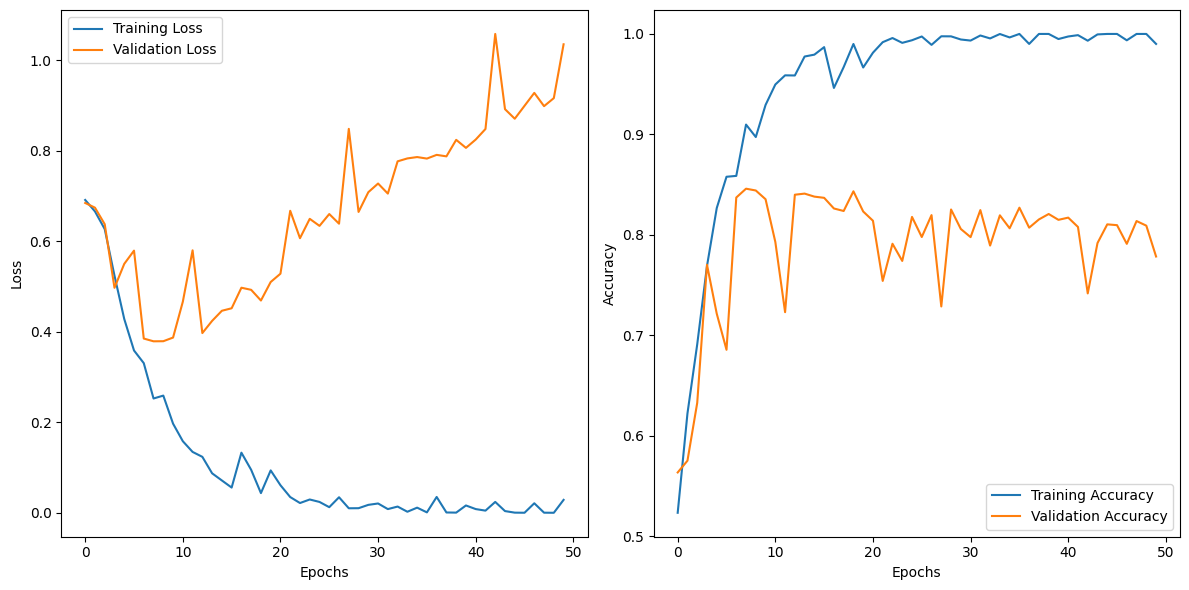

Model: LSTM
Final Validation Accuracy: 0.8640000224113464


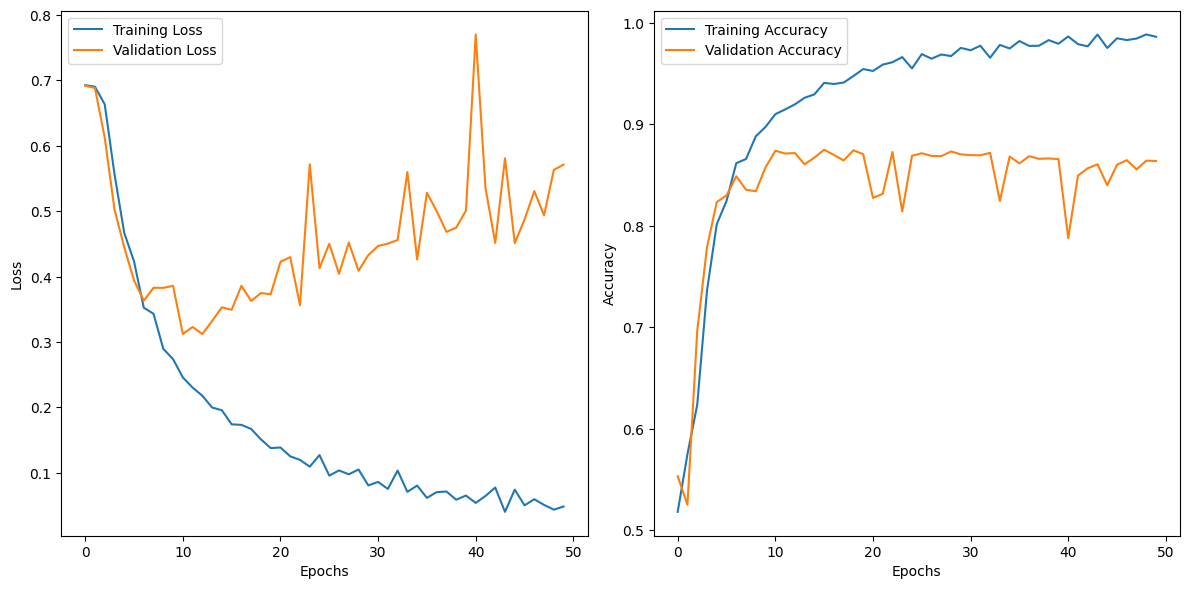

Model: Bidirectional LSTM
Final Validation Accuracy: 0.8567000031471252


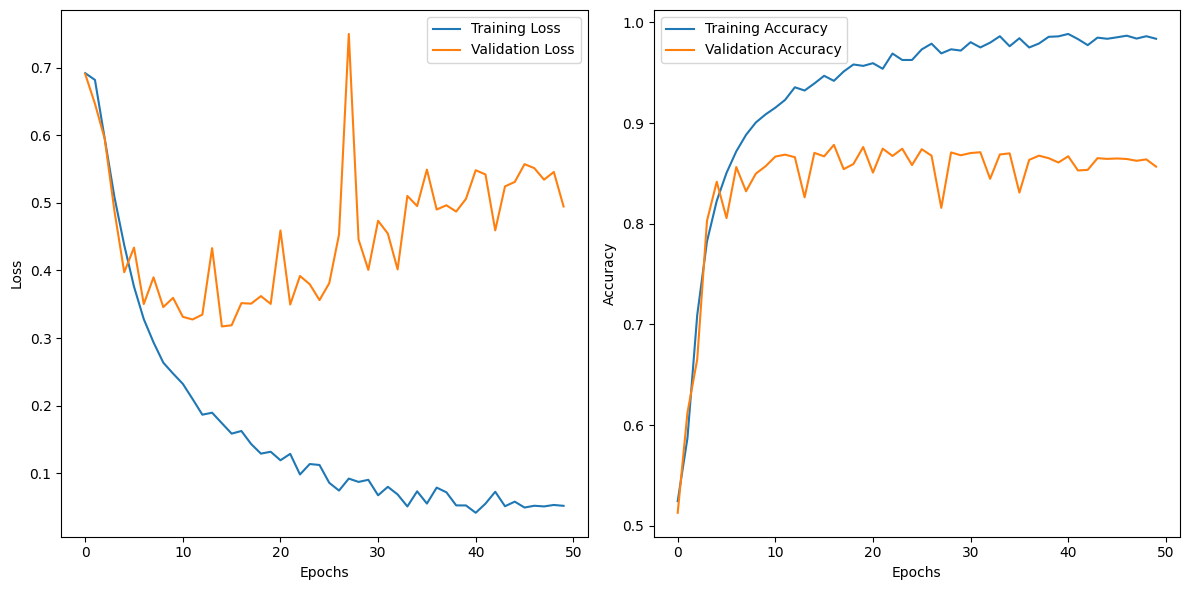

Model: Deep LSTM
Final Validation Accuracy: 0.8593000173568726


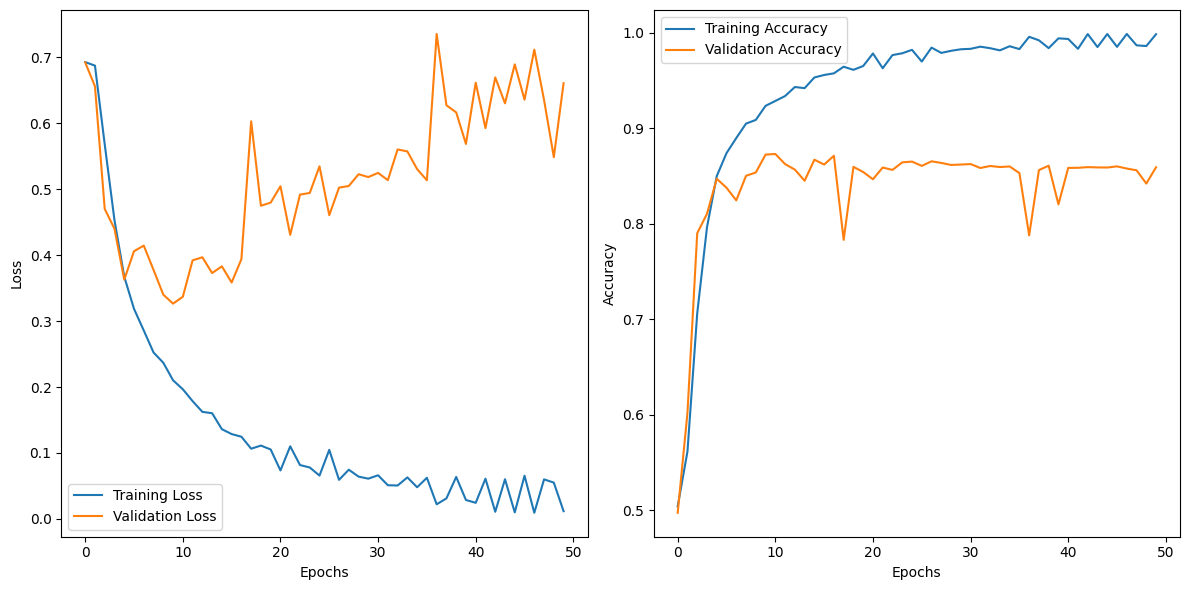

In [27]:
import matplotlib.pyplot as plt

# Список імен та історій навчання моделей
models = [
    ("Simple RNN", history_rnn),
    ("LSTM", history_lstm),
    ("Bidirectional LSTM", history_bidirectional),
    ("Deep LSTM", history_deep_lstm)
]

# Виведення остаточної точності та побудова графіків
for name, history in models:
    print(f"Model: {name}")
    print(f"Final Validation Accuracy: {history.history['val_acc'][-1]}")

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['acc'], label='Training Accuracy')
    plt.plot(history.history['val_acc'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# **Висновок**


**Simple RNN** - Має найнижчу точність серед усіх розглянутих моделей, що становить приблизно 77,85%. Хоча навчання відбувається швидше, ніж у складніших моделей, це призводить до меншої точності.

**LSTM** - Показує високу точність, близько 86,40%, що робить її однією з найкращих моделей серед розглянутих. LSTM здатний ефективно моделювати довгострокові залежності у послідовностях даних.

**Bidirectional LSTM** - Досягає майже такої самої високої точності, як і Deep LSTM, з остаточною точністю близько 85,67%. Використання двонаправленого LSTM дозволяє краще враховувати контекст, що сприяє покращенню точності.

**Deep LSTM** - Має таку саму високу точність, як і Bidirectional LSTM, близько 85,93%. Глибокі LSTM мережі здатні краще управляти складними залежностями у вхідних даних, що дозволяє досягти високої точності.

**Отже**, LSTM, Bidirectional LSTM та Deep LSTM є найефективнішими моделями для класифікації рецензій на датасеті IMDb, з точностю близько 86,40%, 85,67% та 85,93% відповідно. Проста RNN, хоча є швидшою в навчанні, має нижчу точність, що робить її менш відповідною для цієї задачі.